In [1]:
using Pkg
Pkg.activate(".");

  Activating new environment at `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`


# KR1: The Complete Elliptic Integral of the First Kind

In this session, we will make a custom function in Julia that will evaluate the [complete elliptic integral of the first kind](https://mathworld.wolfram.com/CompleteEllipticIntegraloftheFirstKind.html). This physics textbook function is very important in solving the periods of many oscillators, and in particular is used to compute the period of pendulums.

Given a simple pendulum with length $\ell$, mass $m$, and initial angular displacement $\theta_0$. By conservation of energy, we have
\begin{equation}
    -m\mathrm{g}\ell\cos\theta_0=\frac{1}{2}m\ell^2\dot{\theta}^2-m\mathrm{g}\ell\cos\theta.
\end{equation}
Then, rearranging terms, dividing both sides by $\frac{1}{2}m\ell^2$, rewriting $\omega_0^2=\mathrm{g}/\ell$, using $\cos\theta=1-2\sin^2(\frac{1}{2}\theta)$, taking the square root of both sides, and factoring $\sin^2(\frac{1}{2}\theta_0)$, we have
\begin{equation}
    \frac{\mathrm{d}\theta}{\mathrm{d}t}=2\omega_0\sin^2\left(\tfrac{1}{2}\theta_0\right)\sqrt{1-\dfrac{\sin^2\left(\tfrac{1}{2}\theta\right)}{\sin^2\left(\tfrac{1}{2}\theta_0\right)}}.
\end{equation}
Then, rearranging terms, integrating both sides with respect to time $t\in[0,T/4]$ and angular displacement $\theta\in[0,\theta_0]$, where $T$ is the period of the pendulum, we have:
\begin{equation}
    T=\dfrac{2}{\omega_0}\int_0^{\theta_0}\dfrac{\mathrm{d}\theta/\sin\left(\frac{1}{2}\theta_0\right)}{\sqrt{1-\sin^2\left(\tfrac{1}{2}\theta\right)/\sin^2\left(\tfrac{1}{2}\theta_0\right)}}.
\end{equation}
To aid now in evaluating this, we use the substitution $\sin\phi=\sin(\theta/2)/\sin(\theta_0/2)$ so $2\cos\phi\,\mathrm{d}\phi/\cos\left(\frac{1}{2}\theta\right)=\mathrm{d}\theta/\sin\left(\frac{1}{2}\theta_0\right)$, thus after many simplifications, and letting $k=\sin(\theta_0/2)$, we have period of pendulum is
\begin{equation}
    T=\dfrac{4}{\omega_0}\int_0^{\pi/2}\dfrac{\mathrm{d}\phi}{\sqrt{1-k^2\sin^2\phi}}, \qquad k=\sin(\theta_0/2).
\end{equation}
and the integral in the period is the Complete Elliptic Integral of the First Kind.

The Complete Elliptic Integral of the First Kind $K(k)$ is given by:
\begin{equation}
    K(k)=\int_0^{\pi/2}\dfrac{\mathrm{d}\theta}{\sqrt{1-k^2\sin^2\theta}}, \qquad |k|<1,
\end{equation}
However, evaluating the function by integrating this expression would be cumbersome because it does not give you the correct values. ~(I know, I've tried.)~

Instead, we use the series expansion of $K(k)$ given in Arfken:
\begin{equation}
    K(k)=\dfrac{\pi}{2}\sum_{n=0}^\infty\left[\dfrac{(2n-1)!!}{(2n)!!}\right]^2k^n=\dfrac{\pi}{2}\left[1+\left(\dfrac{1}{2}\right)^2k+\left(\dfrac{1\cdot3}{2\cdot4}\right)^2k^2+\left(\dfrac{1\cdot3\cdot5}{2\cdot4\cdot6}\right)^2k^3+\dotsc\right], \quad \abs{k}<1
\end{equation}
to reliably evaluate the function.

In implementing this form of $K(k)$, we must note that our accuracy is determined by the number of terms we put in our sum.

Doing this in Julia, we have the following code.

In [38]:
# Evaluates the double factorial
function double_factorial(n)
    if n < 2
        return 1
    end
    return n * double_factorial(n-2)
end

# Evaluate the complete elliptic integral of the first kind K(k)
function K(k::Float64)
    result = (pi/2) * sum((double_factorial(2*n-1)/double_factorial(2*n))^2 * k^n for n=1:150)
    return result
end;

# KR2: Comparing our ```K(k)``` with Julia's ```ellipk(k)```

Let us compare this to the ```ellipk(k)``` function in Julia's ```Special Functions.jl``` [package](https://specialfunctions.juliamath.org/stable/functions_list/#SpecialFunctions.ellipk).

To have an overview of the output of ```K(k)``` and ```ellipk(k)```, let us first plot it for $k\in[0,1)$.

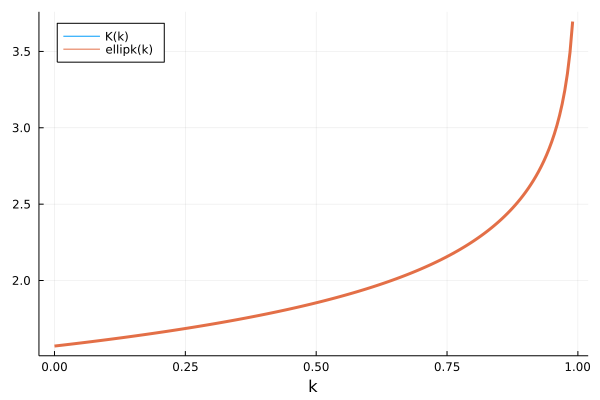

In [44]:
using SpecialFunctions
using Plots

# Values of k to evaluate
k = 0:0.005:0.990

# Arrays where the result will be stored
own_func = zeros(length(k))  # To store result of K(k)
jul_func = zeros(length(k))  # To store result of ellipk(k)

# Result of each function
own_func .= K.(k)
jul_func .= ellipk.(k);

gr()
plot(k, [own_func, jul_func], xaxis="k", label=["K(k)" "ellipk(k)"], legend=:topleft, lw=3, fmt=:png)

To begin, let us see how both ```K(k)``` and ```ellipk(k)``` behave for $k\in[0,1)$. 